## D209 - Data Mining I - PA1

### Import Libraries

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

### Load Data From medical_clean.csv

In [262]:
# load data file
df = pd.read_csv('medical_clean.csv')
# quick test the data is present and see the shape
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


---
### Exploratory Data Analysis
---

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

#### Look for Missing Values

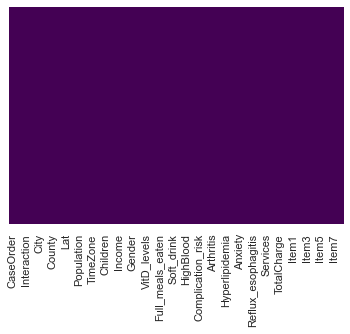

In [264]:
# Mapping to view missing data...none present.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [265]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### Describe and Explore Numeric Fields:

In [266]:
df.describe(include = [np.number])

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [267]:
df_num = df.select_dtypes(include='number')
df_num.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


### Describe and Explore Categorical Fields:

In [268]:
df.describe(exclude = [np.number])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6072,52,1607,3,26,639,5,...,2,2,2,2,2,2,2,2,2,4
top,J996358,d3fb6bb4-7af2-4e0f-a560-38d9b85f550f,8f1c55480f3ae80979083c8151dd6e4b,Houston,TX,Jefferson,Rural,America/New_York,Outdoor activities/education manager,Widowed,...,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,1,1,1,36,553,118,3369,3889,29,2045,...,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


In [269]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan


In [270]:
df[['ReAdmis']].describe()
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [271]:
df['ReAdmis_Yes'] = df['ReAdmis']
df['ReAdmis_Yes'] = df['ReAdmis_Yes'].eq('Yes').astype(int)
df['ReAdmis_Yes']

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: ReAdmis_Yes, Length: 10000, dtype: int64

In [272]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8', 'ReAdmis_Yes'],
      dtype='object')

In [273]:
df_num.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [274]:
df['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [275]:
df['Initial_admin'].value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

---
##  **Part 1: Research Question:**
### [A1] **Question:** "From information about previous patients who were readmitted, can we predict which patients are likely to be readmitted in the future?"



---
### **Data Preparation**
---

### Prune Data

In [276]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8', 'ReAdmis_Yes'],
      dtype='object')

In [277]:
# Start pruning non-relavent series
pruned_df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', \
                     'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', \
                     'Children', 'Income', 'Marital', 'VitD_levels', 'Full_meals_eaten', \
                     'Soft_drink', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
pruned_df.head()

,Age,Gender,ReAdmis,Doc_visits,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,...,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,ReAdmis_Yes
0,53,Male,No,6,0,Emergency Admission,Yes,No,Medium,No,...,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,0
1,51,Female,No,4,1,Emergency Admission,Yes,No,High,Yes,...,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,0
2,53,Female,No,4,0,Elective Admission,Yes,No,Medium,Yes,...,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,0
3,78,Male,No,4,0,Elective Admission,No,Yes,Medium,No,...,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,0
4,22,Female,No,5,2,Elective Admission,No,No,Low,No,...,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,0


In [278]:
pruned_df.columns

Index(['Age', 'Gender', 'ReAdmis', 'Doc_visits', 'vitD_supp', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis_Yes'],
      dtype='object')

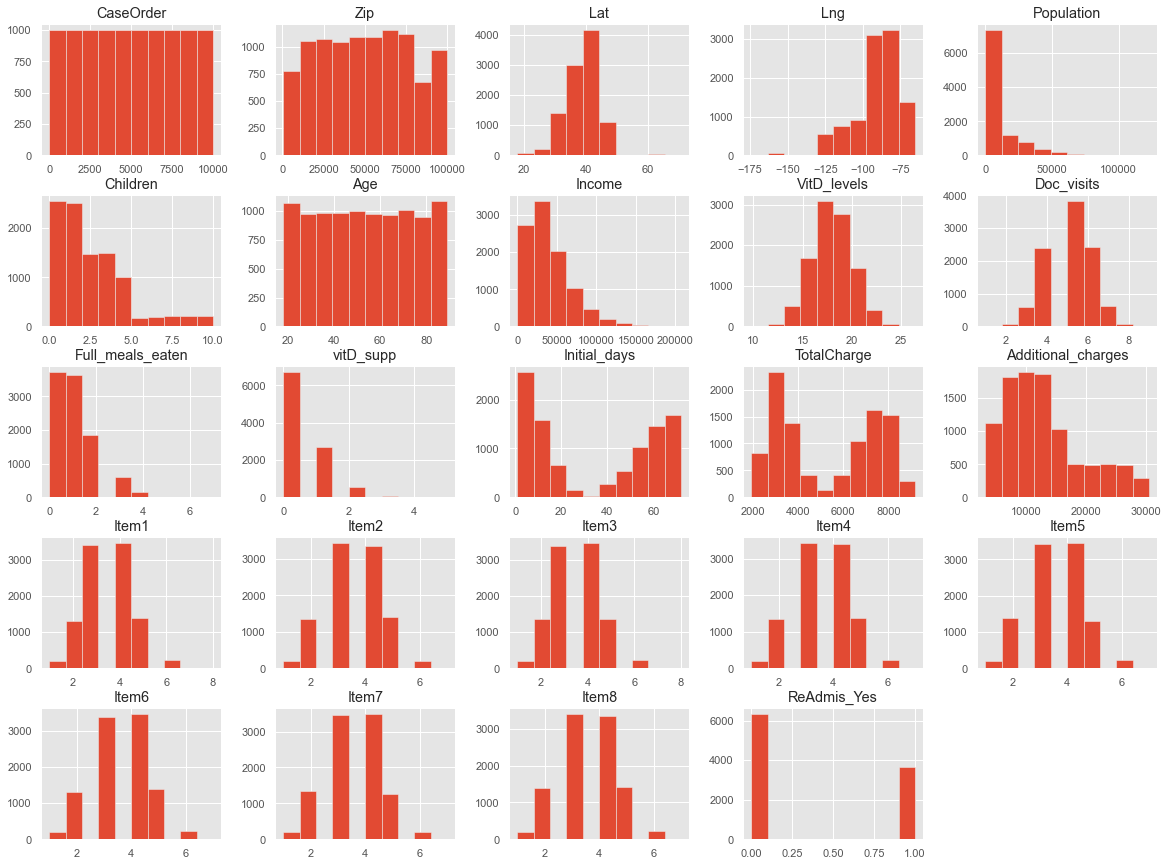

In [279]:
# https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
plt.style.use('ggplot')
# df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
X = pruned_df.drop('ReAdmis_Yes', 1).values # drop target variable
y1 = pruned_df['ReAdmis_Yes'].values
pd.DataFrame.hist(df, figsize = [20,15]);

In [280]:
# https://realpython.com/knn-python/
# Correlations with target?
correlation_matrix = pruned_df.corr()

print(correlation_matrix["ReAdmis_Yes"] > 0.5)

Age                   False
Doc_visits            False
vitD_supp             False
Initial_days           True
TotalCharge            True
Additional_charges    False
ReAdmis_Yes            True
Name: ReAdmis_Yes, dtype: bool


####   [D1] Construct an initial multiple regression model from _all_ predictors that were identified in [C2]

In [281]:
pruned_df = pruned_df[['Initial_days', 'TotalCharge', 'ReAdmis_Yes']]

In [282]:
pruned_df.shape

(10000, 3)

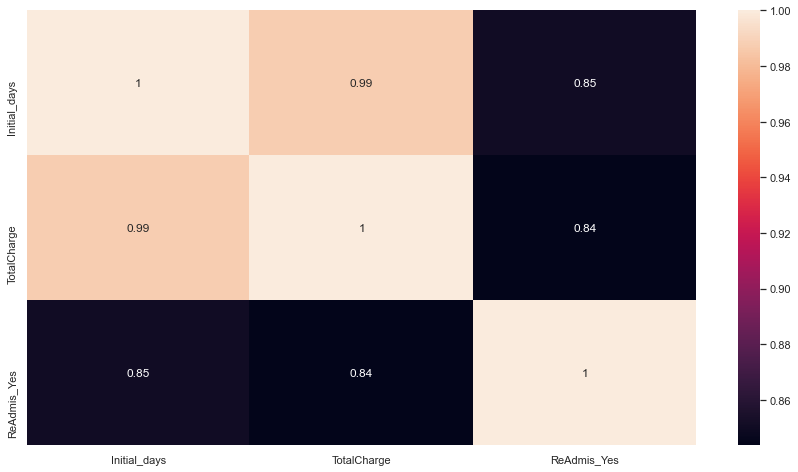

In [283]:
# Trying to make sense of numerical values, discover possible correlations
# Ref1: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
# Ref2: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(pruned_df.corr(), annot=True);

## KNN

### Define Distances on the Vectors of Independent Vars

In [284]:
# Independed Var
# pruned_df = pruned_df[['Initial_days', 'TotalCharge', 'ReAdmis_Yes']]
X = pruned_df.drop('ReAdmis_Yes', axis=1)
X = X.values

# Dependent Var
y = pruned_df['ReAdmis_Yes']
y = y.values

## Confusion Matrix

### Supervised Learning: To Predict Target Variable (ReAdmi_Yes) Given Predictor Vars
#### Classification: Target Variable is Catagorical
#### Features --> Predictor Vars --> Independent Vars
#### Target Vars --> Dependent Vars --> Response Vars

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)  # From Fit kNN Regression Below

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3, 
    random_state=73, 
    stratify=y)  # stratisfy reflects labels of data for both train and test
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred));

Test set predictions:
 [0 1 0 ... 0 1 0]


In [286]:
#accuracy of Model
knn.score(X_test, y_test)

0.9766666666666667

In [287]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1899
           1       0.97      0.97      0.97      1101

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



## Preprocessing - Scaling

In [288]:
from sklearn.preprocessing import scale
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=73)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.980333
k-NN score for training set: 0.986143
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1899
           1       0.97      0.97      0.97      1101

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [289]:
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(confusion_matrix(y_test, y_pred))

k-NN score for test set: 0.980333
k-NN score for training set: 0.986143
[[1870   29]
 [  30 1071]]


## Logistic Regression, Probability Thresholds and ROC Curve

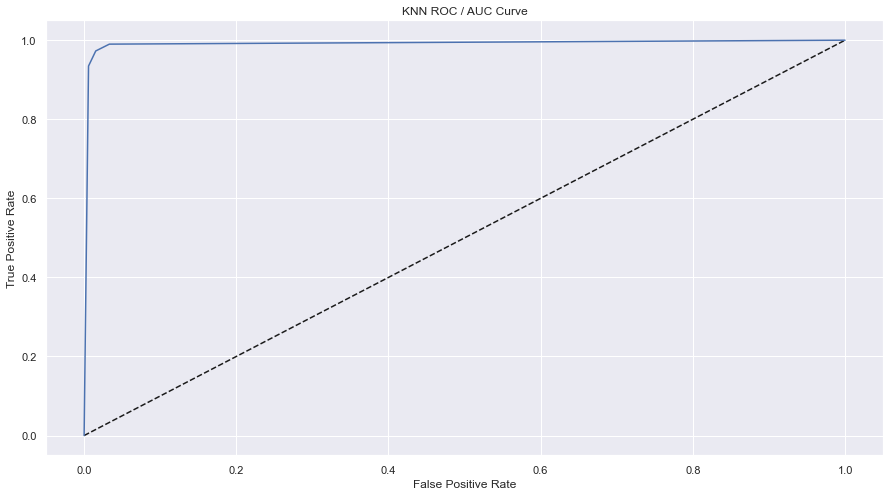

In [290]:
from sklearn.metrics import roc_curve
y_pred_prob = knn.predict_proba(Xs_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC / AUC Curve')
plt.show();

In [291]:
knn.predict_proba(Xs_test)[:,1]

array([0., 1., 0., ..., 0., 0., 0.])

In [292]:
from sklearn.metrics import roc_auc_score

y_pred_prob = knn.predict_proba(Xs_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.9913121730018046

In [293]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5,
                                scoring='roc_auc')
print(cv_scores)

[0.99454297 0.99455041 0.99318801 0.99310461 0.82710784]


In [294]:
# Optimal KNN
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 100)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 2}

In [295]:
knn_cv.best_score_

0.9273999999999999

## Prediction for Classification

In [296]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=73)
rfc.fit(Xs_train, y_train)
rfc.predict(Xs_test)

array([0, 1, 0, ..., 0, 0, 0])

In [297]:
pd.Series(rfc.predict(Xs_test)).value_counts()

0    1907
1    1093
dtype: int64

In [298]:
 rfc.predict_proba(Xs_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [299]:
rfc = RandomForestClassifier(random_state=73)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 73,
 'verbose': 0,
 'warm_start': False}

In [300]:
rfc.fit(Xs_train, y_train)
rfc.score(Xs_test, y_test)

0.98

In [301]:
# Using scikit-learn to Inspect Model Fit
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

train_preds = knn_model_2.predict(Xs_train)
mse = mean_squared_error(y_train, train_preds)
print("MSE: ", mse)

test_preds = knn_model_2.predict(Xs_test)
mae = mean_absolute_error(y_test, test_preds)
print("MAE: ", mae)


MSE:  0.013857142857142858
MAE:  0.019666666666666666


In [302]:
test_preds = knn_model_2.predict(Xs_test)
mse = mean_squared_error(y_test, test_preds)
mse
#rmse = sqrt(mse)
#rmse

0.019666666666666666

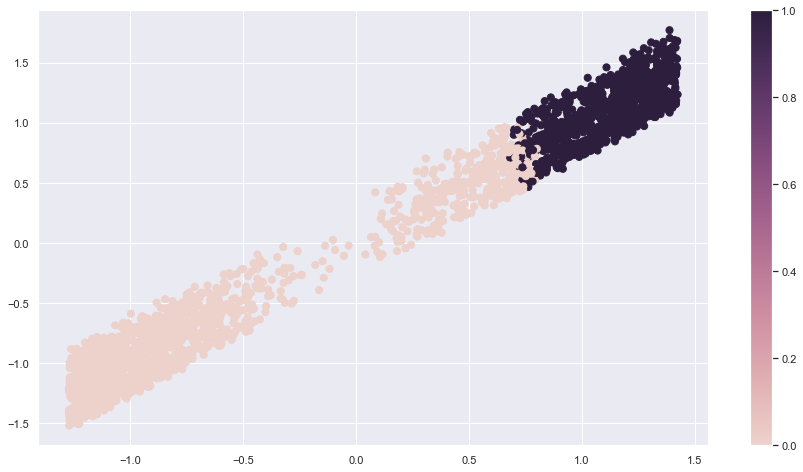

In [303]:
# Predicted
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    Xs_test[:, 0], Xs_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

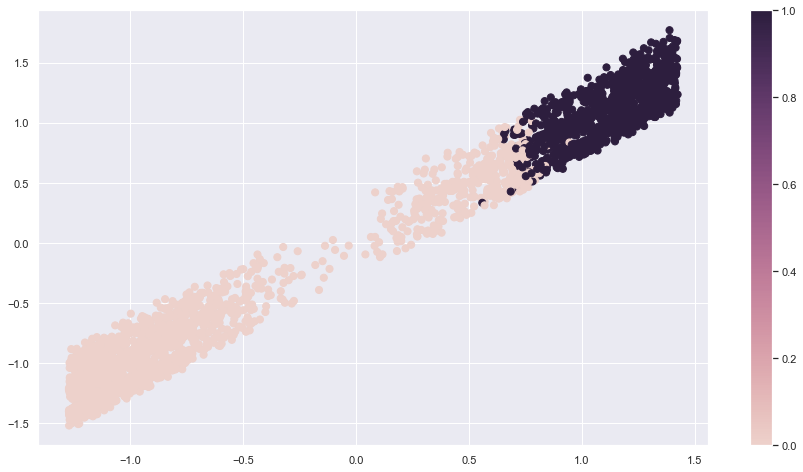

In [304]:
# Actual
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    Xs_test[:, 0], Xs_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In [305]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.019666666666666666

In [306]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.019666666666666666

In [307]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_test, y_pred)

0.9803333333333333

In [308]:
precision_score(y_test, y_pred)

0.9736363636363636

In [309]:
recall_score(y_test, y_pred)

0.9727520435967303

In [310]:
pruned_df

,Initial_days,TotalCharge,ReAdmis_Yes
0,10.585770,3726.702860,0
1,15.129562,4193.190458,0
2,4.772177,2434.234222,0
3,1.714879,2127.830423,0
4,1.254807,2113.073274,0
...,...,...,...
9995,51.561220,6850.942000,0
9996,68.668240,7741.690000,1
9997,70.154180,8276.481000,1
9998,63.356900,7644.483000,1


### Export Data

In [311]:
[['Initial_days', 'TotalCharge', 'ReAdmis_Yes']]

[['Initial_days', 'TotalCharge', 'ReAdmis_Yes']]

In [312]:
X_train.shape

(7000, 2)

In [313]:
# Export Training Data
X_train_data = pd.DataFrame(X_train, columns = ['Initial_days','TotalCharge'])
y_train_data = pd.DataFrame(y_train, columns = ['ReAdmis_Yes'])

In [314]:
# Export Testing Data
X_test_data = pd.DataFrame(X_test, columns = ['Initial_days','TotalCharge'])
y_test_data = pd.DataFrame(y_test, columns = ['ReAdmis_Yes'])

In [315]:
pruned_df.to_csv('final_cleaned_dataset.csv', index=False)
X_train_data.to_csv('X_train_data.csv', index=False)
X_test_data.to_csv('X_test_data.csv', index=False)
y_train_data.to_csv('y_train_data.csv', index=False)
y_test_data.to_csv('y_test_data.csv', index=False)

In [316]:
pruned_df.describe()

,Initial_days,TotalCharge,ReAdmis_Yes
count,10000.000000,10000.000000,10000.000000
mean,34.455299,5312.172769,0.366900
std,26.309341,2180.393838,0.481983
min,1.001981,1938.312067,0.000000
25%,7.896215,3179.374015,0.000000
50%,35.836244,5213.952000,0.000000
75%,61.161020,7459.699750,1.000000
max,71.981490,9180.728000,1.000000


In [317]:
pruned_df.nunique()

Initial_days    9997
TotalCharge     9997
ReAdmis_Yes        2
dtype: int64

In [318]:
pruned_df['ReAdmis_Yes'].value_counts()

0    6331
1    3669
Name: ReAdmis_Yes, dtype: int64